In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split




### Etape 1

In [3]:
# Charger le fichier local
df = pd.read_csv("ObesityDataSet.csv")

# Aperçu des données
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Dimensions du dataset
df.shape

(2111, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
df.select_dtypes(include='object').nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              4
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [9]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [10]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [11]:
df['NObeyesdad'].value_counts(normalize=True) * 100

NObeyesdad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: proportion, dtype: float64

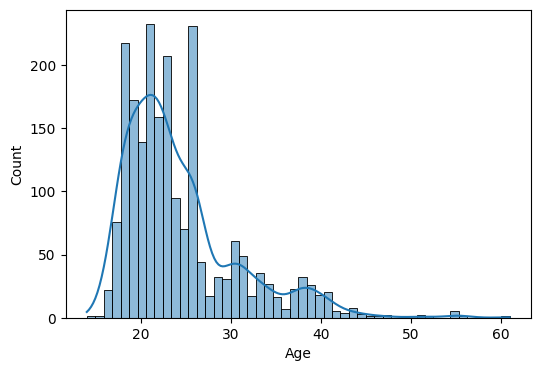

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.show()

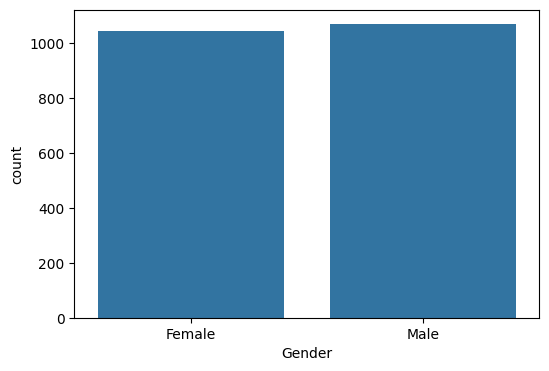

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.show()

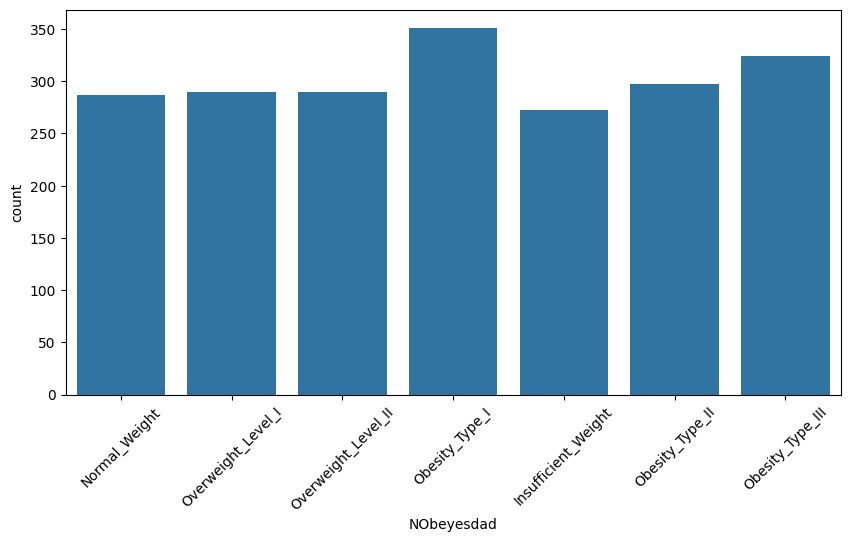

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad')
plt.xticks(rotation=45)
plt.show()

### Etape 2

In [15]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [16]:
num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include='object').columns
num_cols, cat_cols

(Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object'),
 Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
        'SCC', 'CALC', 'MTRANS'],
       dtype='object'))

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [18]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [19]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

In [21]:
X_train.shape, X_val.shape, X_test.shape

((1266, 16), (422, 16), (423, 16))

### Etape 3

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd

In [23]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'MLP': MLPClassifier(max_iter=500, random_state=42)
}

In [24]:
pipelines = {}
for name, clf in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

In [25]:
results = []

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_val_pred = pipe.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred, average='macro')
    results.append((name, acc, f1))
    print(name)
    print(classification_report(y_val, y_val_pred))
    print("-" * 60)

results_df = pd.DataFrame(results, columns=['Model', 'Validation_Accuracy', 'Validation_F1'])
results_df.sort_values(by='Validation_Accuracy', ascending=False)


C:\Users\44786\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.83      0.53      0.65        57
           2       0.91      0.90      0.91        70
           3       0.97      1.00      0.98        59
           4       1.00      0.98      0.99        65
           5       0.65      0.81      0.72        58
           6       0.72      0.71      0.71        58

    accuracy                           0.85       422
   macro avg       0.85      0.84      0.84       422
weighted avg       0.85      0.85      0.84       422

------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        55
           1       0.78      0.37      0.50        57
           2       0.82      0.93      0.87        70
           3       0.91      1.00      0.95        59
           4       1.00      1.00      1.00     

,Model,Validation_Accuracy,Validation_F1
4,GradientBoosting,0.947867,0.946704
3,RandomForest,0.936019,0.934819
6,MLP,0.936019,0.933772
2,DecisionTree,0.926540,0.924487
5,SVC,0.921801,0.919243
0,LogisticRegression,0.848341,0.839799
1,KNN,0.836493,0.817919


### Etape 4

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [2, 3, 4]
}

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gb_search = GridSearchCV(
    gb_pipeline, param_grid_gb, cv=3, n_jobs=-1, scoring='accuracy'
)

gb_search.fit(X_train, y_train)
gb_search.best_params_


{'classifier__learning_rate': 0.2,
 'classifier__max_depth': 4,
 'classifier__n_estimators': 100}

In [27]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_search = GridSearchCV(
    rf_pipeline, param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy'
)

rf_search.fit(X_train, y_train)
rf_search.best_params_


{'classifier__max_depth': None,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200}

In [28]:
param_grid_mlp = {
    'classifier__hidden_layer_sizes': [(50,), (100,), (100,50)],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__learning_rate_init': [0.001, 0.01],
    'classifier__alpha': [0.0001, 0.001]
}

mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(max_iter=500, random_state=42))
])

mlp_search = GridSearchCV(
    mlp_pipeline, param_grid_mlp, cv=3, n_jobs=-1, scoring='accuracy'
)

mlp_search.fit(X_train, y_train)
mlp_search.best_params_


{'classifier__activation': 'tanh',
 'classifier__alpha': 0.0001,
 'classifier__hidden_layer_sizes': (100, 50),
 'classifier__learning_rate_init': 0.01}

In [29]:
gb_best = gb_search.best_estimator_
rf_best = rf_search.best_estimator_
mlp_best = mlp_search.best_estimator_

### Etape 5

In [30]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd

In [31]:
best_models = {
    'GB_opt': gb_best,
    'RF_opt': rf_best,
    'MLP_opt': mlp_best
}

val_results = []

for name, model in best_models.items():
    y_val_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred, average='macro')
    val_results.append((name, acc, f1))
    print(name)
    print(classification_report(y_val, y_val_pred))
    print('-' * 60)

val_results_df = pd.DataFrame(val_results, columns=['Model', 'Val_Accuracy', 'Val_F1'])
val_results_df.sort_values(by='Val_Accuracy', ascending=False)

GB_opt
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.98      0.82      0.90        57
           2       0.94      0.97      0.96        70
           3       1.00      0.98      0.99        59
           4       1.00      0.95      0.98        65
           5       0.86      0.97      0.91        58
           6       0.93      0.97      0.95        58

    accuracy                           0.95       422
   macro avg       0.95      0.95      0.95       422
weighted avg       0.95      0.95      0.95       422

------------------------------------------------------------
RF_opt
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        55
           1       0.81      0.88      0.84        57
           2       0.98      0.91      0.95        70
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        65
   

,Model,Val_Accuracy,Val_F1
2,MLP_opt,0.966825,0.965399
0,GB_opt,0.950237,0.949260
1,RF_opt,0.931280,0.930220


In [32]:
test_results = []

for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='macro')
    test_results.append((name, acc, f1))
    print(name)
    print(classification_report(y_test, y_test_pred))
    print('-' * 60)

test_results_df = pd.DataFrame(test_results, columns=['Model', 'Test_Accuracy', 'Test_F1'])
test_results_df.sort_values(by='Test_Accuracy', ascending=False)

GB_opt
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        54
           1       0.83      0.93      0.88        58
           2       0.93      0.94      0.94        70
           3       0.98      0.97      0.97        60
           4       1.00      0.98      0.99        65
           5       0.89      0.88      0.89        58
           6       0.95      0.93      0.94        58

    accuracy                           0.94       423
   macro avg       0.94      0.93      0.94       423
weighted avg       0.94      0.94      0.94       423

------------------------------------------------------------
RF_opt
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.78      0.91      0.84        58
           2       0.94      0.96      0.95        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
   

,Model,Test_Accuracy,Test_F1
2,MLP_opt,0.971631,0.970779
0,GB_opt,0.936170,0.935665
1,RF_opt,0.929078,0.928379


In [37]:
import joblib
joblib.dump(mlp_best, "best_model.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']